# Chapter 3: How Prophet Works

## The math behind Prophet

### Linear growth

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)  # set random seed for repeatability

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())
y = [1 / (1 + np.e ** (-.04 * (val - 50))) for val in range(len(x))]  # create logistic curve
y = [y[idx] + y[idx] * .1 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation
y = [int(500 * val) for val in y]  # scale up

df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

15:54:52 - cmdstanpy - INFO - Chain [1] start processing
15:54:52 - cmdstanpy - INFO - Chain [1] done processing


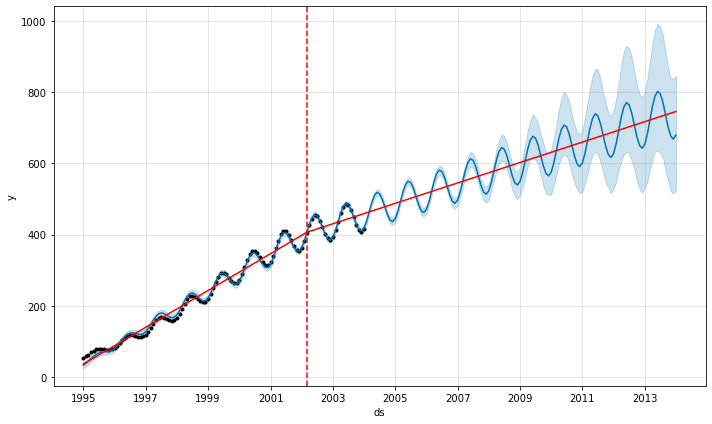

In [3]:
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative',
                n_changepoints=1)
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

### Logistic growth

In [4]:
df['cap'] = 500

In [5]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')

15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future['cap'] = 500

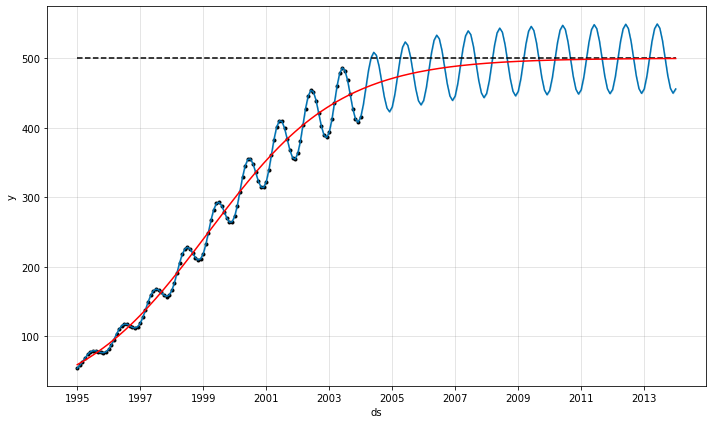

In [7]:
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [8]:
def set_cap(row, df):
    if row.year < 2007:
        return 500
    else:
        pop_2007 = 500
        idx_2007 = df[df['ds'].dt.year == 2007].index[0]
        idx_date = df[df['ds'] == row].index[0]
        return pop_2007 + 2 * (idx_date - idx_2007)

In [9]:
df['cap'] = df['ds'].apply(set_cap, args=(df,))

15:54:54 - cmdstanpy - INFO - Chain [1] start processing
15:54:55 - cmdstanpy - INFO - Chain [1] done processing


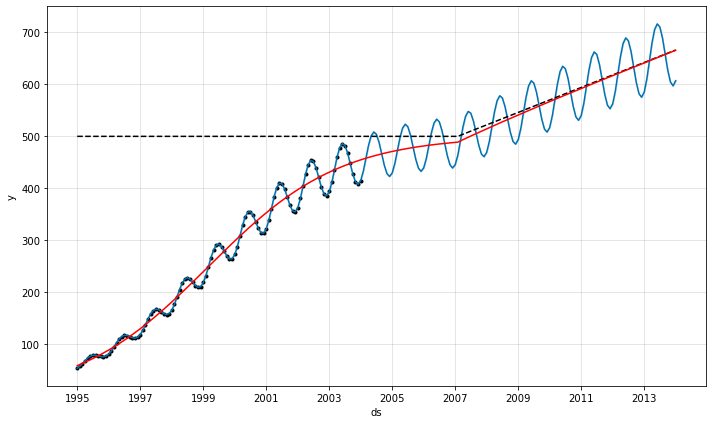

In [10]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
future['cap'] = future['ds'].apply(set_cap, args=(future,))
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

### Seasonality

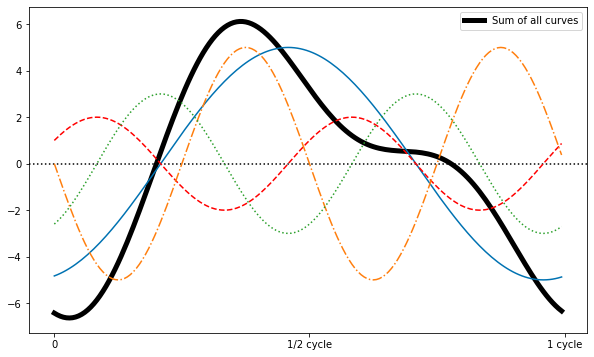

In [11]:
x = pd.date_range('2000-01-01', '2001-01-01', freq='H')
x = range(24 * 7)
y0 = [(-5 * np.sin(((idx / 7) - 17) * (360 / 24) * (np.pi / 180))) for idx in range(len(x))]
y1 = [(-2 * np.sin(((idx / 7) - 5) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y2 = [(-5 * np.sin(((idx / 7) - 12) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y3 = [(-3 * np.sin(((idx / 7) - 20) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y = [y0[idx] + y1[idx] + y2[idx] + y3[idx] for idx in range(len(x))]

plt.figure(figsize=(10, 6))
plt.axhline(0, ls=':', c='k')
plt.plot(y, lw=5, c='k', label='Sum of all curves')
plt.plot(y0, c='#0072B2', ls='-')
plt.plot(y1, c='r', ls='--')
plt.plot(y2, c='tab:orange', ls='-.')
plt.plot(y3, c='tab:green', ls=':')
plt.legend()
plt.xticks(ticks=[0, 84, 168], labels=[0, '1/2 cycle', '1 cycle'])
plt.show()